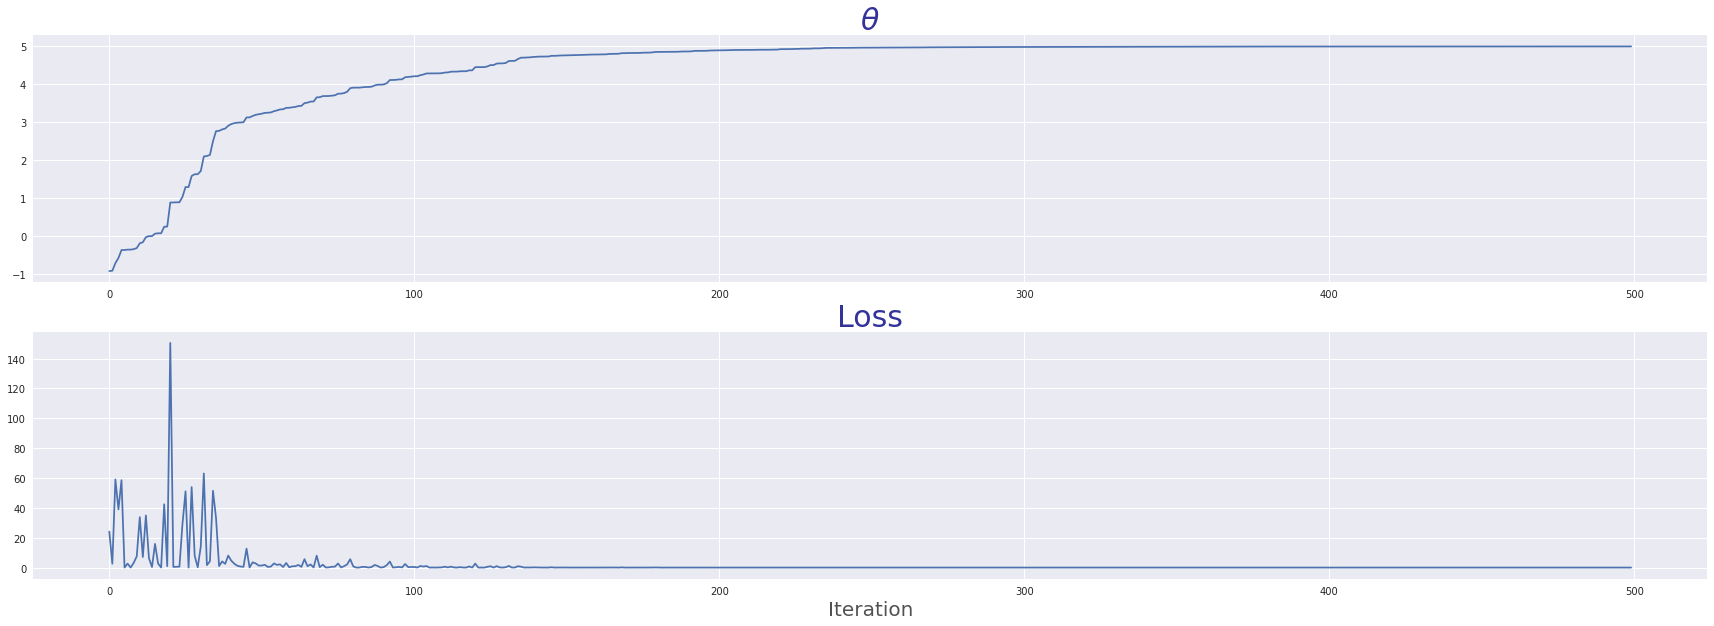

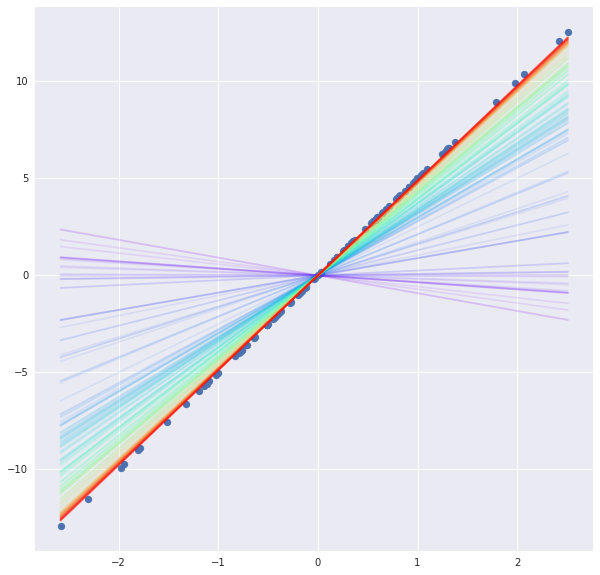

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class dataset_generator: 
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self): 
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0] 
        
    def set_n_sample(self, n_sample): #사용자가 접근할 수 있는 method
        self._n_sample = n_sample #n_sample을 default인 100이 아닌 사용자가 지정한 값으로 지정해줌
        
    def set_noise(self, noise): #사용자가 접근할 수 있는 method
        self._noise = noise
        
    def set_coefficient(self, coefficient_list): #사용자가 접근할 수 있는 method
        self._coefficient = coefficient_list
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size = (self._n_sample, self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
            y_data += self._coefficient[-1] #배열 맨 마지막인 bias를 더해줌
            y_data += self._noise * np.random.normal(0,1,size = (self._n_sample, 1))
        return x_data, y_data
    
    
class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0])
x_data, y_data = dataset_gen.make_dataset()

node1 = mul_node()

node2 = minus_node()
node3 = square_node()

epochs = 5
lr = 0.01
th = -1
loss_list = []
th_list = []

for epoch in range(epochs):
    for data_idx in range(len(x_data)):
        x, y = x_data[data_idx], y_data[data_idx]
        
        z1 = node1.forward(th,x)
        z2 = node2.forward(y,z1)
        l = node3.forward(z2)
        
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)
        
        th = th - lr*dth
        
        th_list.append(th)
        loss_list.append(l)
        
fig, ax = plt.subplots(2,1,figsize = (30,10))
ax[0].plot(th_list)
ax[1].plot(loss_list)

title_font = {'size':30, 'alpha':0.8, 'color': 'navy'}
label_font = {'size':20, 'alpha':0.8}
plt.style.use('seaborn')

ax[0].set_title(r'$\theta$', fontdict = title_font)
ax[1].set_title("Loss", fontdict = title_font)
ax[1].set_xlabel("Iteration", fontdict = label_font)


N_line = 200
cmap = cm.get_cmap('rainbow', lut = N_line)

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x_data, y_data)

test_th = th_list[:N_line]
x_range = np.array([np.min(x_data), np.max(x_data)])

for line_idx in range(N_line):
    pred_line = np.array([x_range[0]*test_th[line_idx], x_range[1]*test_th[line_idx]])
    ax.plot(x_range, pred_line, color = cmap(line_idx), alpha = 0.1)

# Hyper-parameter Tuning

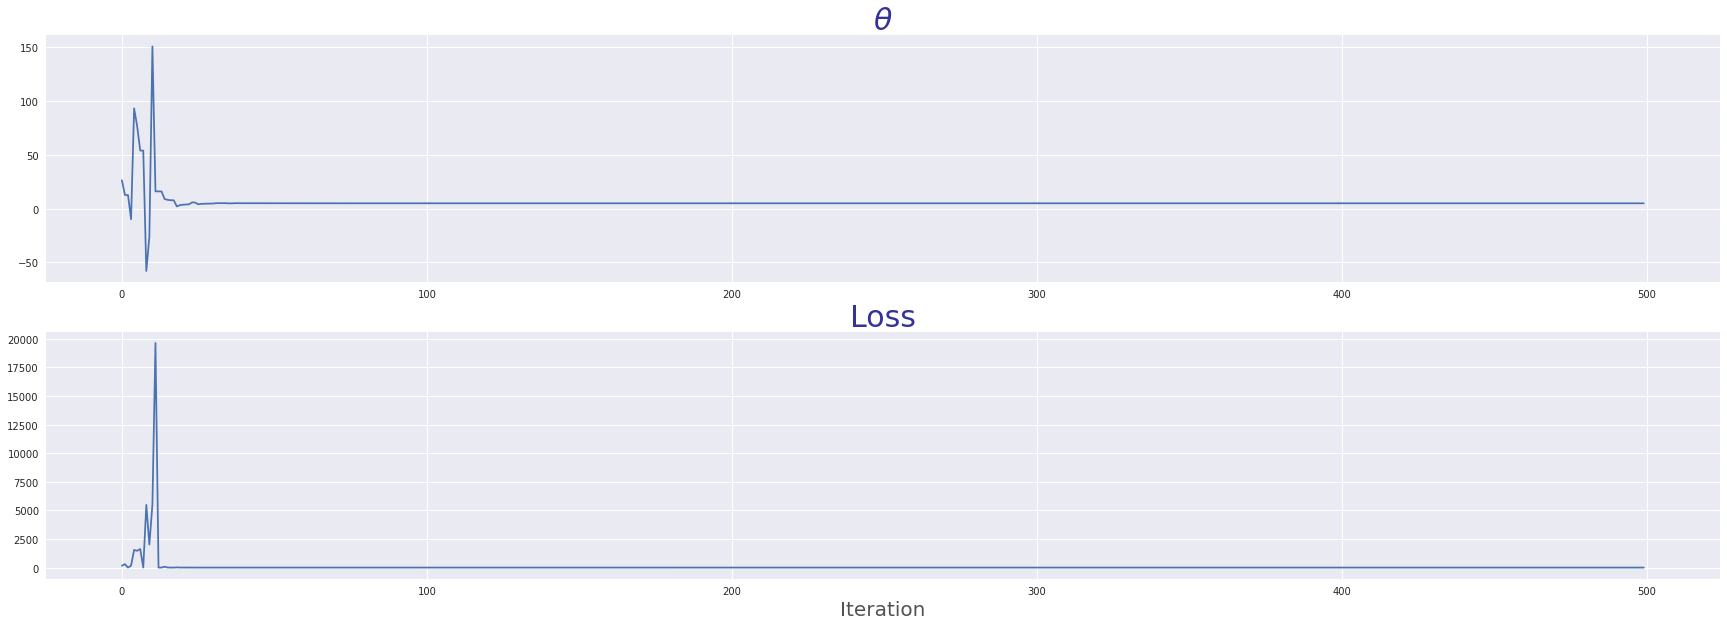

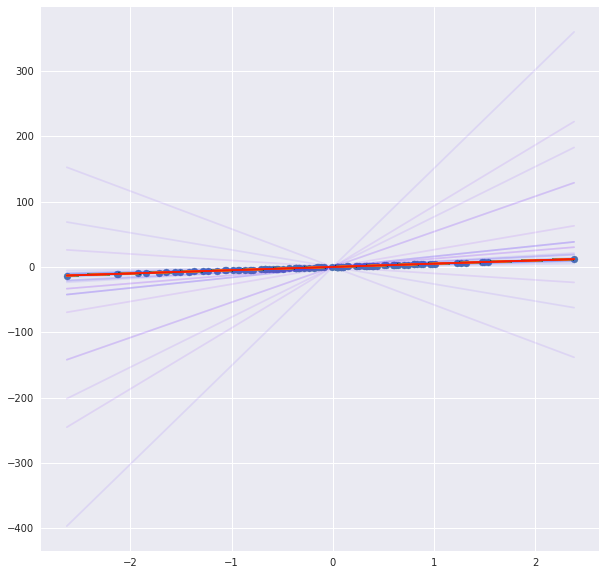

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class dataset_generator: 
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self): 
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0] 
        
    def set_n_sample(self, n_sample): #사용자가 접근할 수 있는 method
        self._n_sample = n_sample #n_sample을 default인 100이 아닌 사용자가 지정한 값으로 지정해줌
        
    def set_noise(self, noise): #사용자가 접근할 수 있는 method
        self._noise = noise
        
    def set_coefficient(self, coefficient_list): #사용자가 접근할 수 있는 method
        self._coefficient = coefficient_list
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size = (self._n_sample, self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
            y_data += self._coefficient[-1] #배열 맨 마지막인 bias를 더해줌
            y_data += self._noise * np.random.normal(0,1,size = (self._n_sample, 1))
        return x_data, y_data
    
    
class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0])
x_data, y_data = dataset_gen.make_dataset()

node1 = mul_node()

node2 = minus_node()
node3 = square_node()

epochs = 5
lr = 0.5
th = -1
loss_list = []
th_list = []

for epoch in range(epochs):
    for data_idx in range(len(x_data)):
        x, y = x_data[data_idx], y_data[data_idx]
        
        z1 = node1.forward(th,x)
        z2 = node2.forward(y,z1)
        l = node3.forward(z2)
        
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)
        
        th = th - lr*dth
        
        th_list.append(th)
        loss_list.append(l)
        
fig, ax = plt.subplots(2,1,figsize = (30,10))
ax[0].plot(th_list)
ax[1].plot(loss_list)

title_font = {'size':30, 'alpha':0.8, 'color': 'navy'}
label_font = {'size':20, 'alpha':0.8}
plt.style.use('seaborn')

ax[0].set_title(r'$\theta$', fontdict = title_font)
ax[1].set_title("Loss", fontdict = title_font)
ax[1].set_xlabel("Iteration", fontdict = label_font)


N_line = 200
cmap = cm.get_cmap('rainbow', lut = N_line)

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x_data, y_data)

test_th = th_list[:N_line]
x_range = np.array([np.min(x_data), np.max(x_data)])

for line_idx in range(N_line):
    pred_line = np.array([x_range[0]*test_th[line_idx], x_range[1]*test_th[line_idx]])
    ax.plot(x_range, pred_line, color = cmap(line_idx), alpha = 0.1)

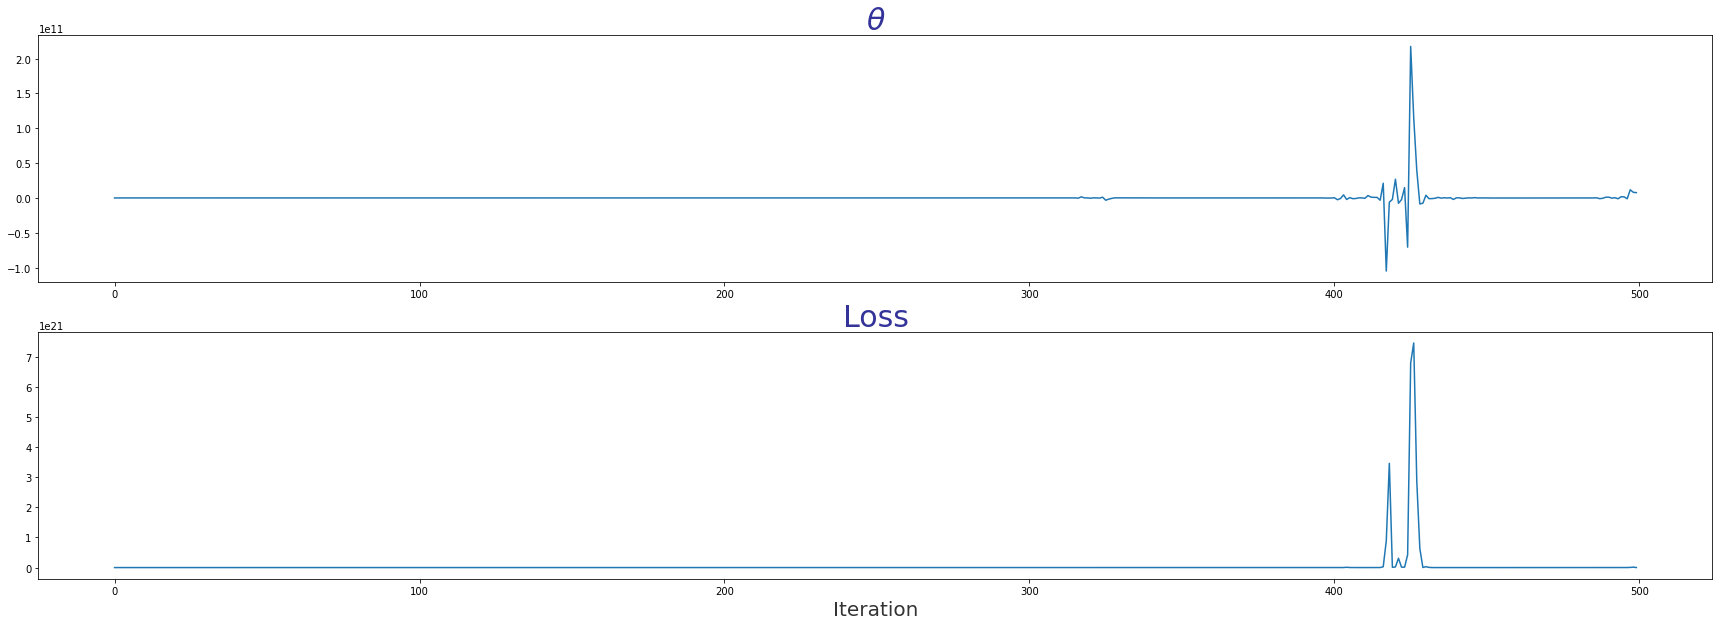

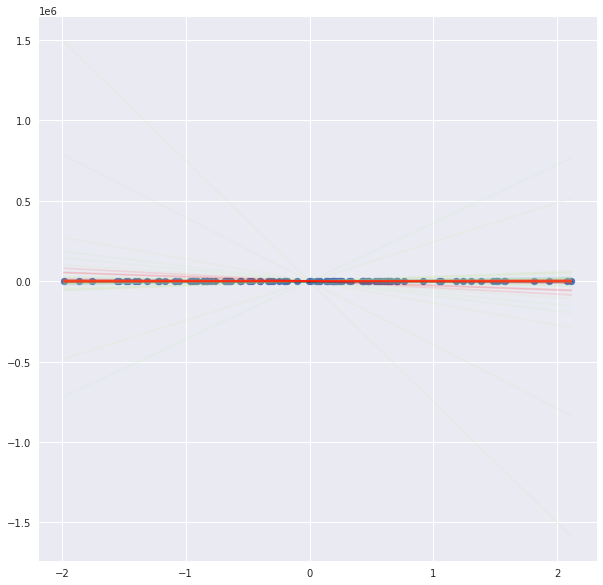

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

class dataset_generator: 
    def __init__(self, feature_dim = 1, n_sample = 100, noise = 0):
        self._feature_dim = feature_dim
        self._n_sample = n_sample
        self._noise = noise
        
        self._coefficient = None
        self._init_set_coefficient()
        
    def _init_set_coefficient(self): 
        self._coefficient = [1 for _ in range(self._feature_dim)] + [0] 
        
    def set_n_sample(self, n_sample): #사용자가 접근할 수 있는 method
        self._n_sample = n_sample #n_sample을 default인 100이 아닌 사용자가 지정한 값으로 지정해줌
        
    def set_noise(self, noise): #사용자가 접근할 수 있는 method
        self._noise = noise
        
    def set_coefficient(self, coefficient_list): #사용자가 접근할 수 있는 method
        self._coefficient = coefficient_list
        
    def make_dataset(self):
        x_data = np.random.normal(0,1, size = (self._n_sample, self._feature_dim))
        y_data = np.zeros(shape = (self._n_sample, 1))
        for feature_idx in range(self._feature_dim):
            y_data += self._coefficient[feature_idx] * x_data[:,feature_idx].reshape(-1,1)
            y_data += self._coefficient[-1] #배열 맨 마지막인 bias를 더해줌
            y_data += self._noise * np.random.normal(0,1,size = (self._n_sample, 1))
        return x_data, y_data
    
    
class plus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x + self._y
        return self._z
    
    def backward(self, dz):
        return dz, dz
    
class minus_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x - self._y
        return self._z
    
    def backward(self, dz):
        return dz, -1*dz
    
class mul_node:
    def __init__(self):
        self._x, self._y = None, None
        self._z = None
        
    def forward(self, x, y):
        self._x, self._y = x, y
        self._z = self._x * self._y
        return self._z
    
    def backward(self, dz):
        return dz*self._y, dz*self._x
    
class square_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = self._x * self._x
        return self._z
    
    def backward(self, dz):
        return dz*2*self._x
    
class mean_node:
    def __init__(self):
        self._x = None
        self._z = None
        
    def forward(self, x):
        self._x = x
        self._z = np.mean(self._x) 
        return self._z
    
    def backward(self, dz):
        dx = dz*1/len(self._x)*np.ones_like(self._x)
        return dx
    
dataset_gen = dataset_generator()
dataset_gen.set_coefficient([5,0])
x_data, y_data = dataset_gen.make_dataset()

node1 = mul_node()

node2 = minus_node()
node3 = square_node()

epochs = 5
lr = 1.5
th = -1
loss_list = []
th_list = []

for epoch in range(epochs):
    for data_idx in range(len(x_data)):
        x, y = x_data[data_idx], y_data[data_idx]
        
        z1 = node1.forward(th,x)
        z2 = node2.forward(y,z1)
        l = node3.forward(z2)
        
        dz2 = node3.backward(1)
        dy, dz1 = node2.backward(dz2)
        dth, dx = node1.backward(dz1)
        
        th = th - lr*dth
        
        th_list.append(th)
        loss_list.append(l)
        
fig, ax = plt.subplots(2,1,figsize = (30,10))
ax[0].plot(th_list)
ax[1].plot(loss_list)

title_font = {'size':30, 'alpha':0.8, 'color': 'navy'}
label_font = {'size':20, 'alpha':0.8}
plt.style.use('seaborn')

ax[0].set_title(r'$\theta$', fontdict = title_font)
ax[1].set_title("Loss", fontdict = title_font)
ax[1].set_xlabel("Iteration", fontdict = label_font)


N_line = 200
cmap = cm.get_cmap('rainbow', lut = N_line)

fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(x_data, y_data)

test_th = th_list[:N_line]
x_range = np.array([np.min(x_data), np.max(x_data)])

for line_idx in range(N_line):
    pred_line = np.array([x_range[0]*test_th[line_idx], x_range[1]*test_th[line_idx]])
    ax.plot(x_range, pred_line, color = cmap(line_idx), alpha = 0.1)